# Plotting oligometastasis intervention benefits

We're going to plot some oligometastasis growth curves. All models are wrong. This one is not exception, but it might be useful. 

Code originally written by Jacob Scott and converted to notebook formatting by Jessica Scarborough. 

## Document and filepath setup

In [2]:
import pylab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import numpy as np
from math import log as ln
from pylab import rcParams


In [164]:
plot_path = '../plots/'

## Parameter space

In [165]:
total_t = int(1.3*10**3)
end_time = int(1.3*10**3)
tumor_doubling_time = [150, 125, 300, 400]  #comment for pcolor, use for surface
# tumor_doubling_time = [120, 150, 300, 400]  #comment for pcolor, use for surface
r = [ln(2) / tumor_doubling_time[i] for i in range(len(tumor_doubling_time))]
print(r)

[0.0046209812037329686, 0.005545177444479563, 0.0023104906018664843, 0.0017328679513998633]


## Build exponential growth curves

In [166]:
N_c = [5]
t0 =  np.linspace(0, end_time, total_t)
t =  np.linspace(0, end_time, total_t)
t1 = np.linspace(int((3/8)*end_time), end_time, int((5/8)*total_t))
t2 = np.linspace(int((1/2)*end_time), end_time, int((1/2)*total_t))
t3 = np.linspace(int((5/8)*end_time), end_time, int((3/8)*total_t))

In [171]:
N0 = [100 for i in range(total_t)]

N = [np.exp(r[0]*t[i]) for i in range(total_t)]
N1 = [(N[int((3/8)*total_t)] - N_c) * np.exp(r[0]*t[i]) for i in range(int((5/8)*total_t))]
N2 = [(N[int((1/2)*total_t)] - N_c) * np.exp(r[0]*t[i]) for i in range(int((1/2)*total_t))]
N3 = [(N[int((5/8)*total_t)] - N_c) * np.exp(r[0]*t[i]) for i in range(int((3/8)*total_t))]

N_fast = [np.exp(r[1]*t[i]) for i in range(total_t)]
N1_fast = [(N_fast[int((3/8)*total_t)] - N_c) * np.exp(r[1]*t[i]) for i in range(int((5/8)*total_t))]
N2_fast = [(N_fast[int((1/2)*total_t)] - N_c) * np.exp(r[1]*t[i]) for i in range(int((1/2)*total_t))]
N3_fast = [(N_fast[int((5/8)*total_t)] - N_c) * np.exp(r[1]*t[i]) for i in range(int((3/8)*total_t))]

# print(N[int(total_t/4)] - N_c,N[int(total_t/2)] - N_c, N[int(3*total_t/4)] - N_c)

## Plot exponential growth curves

First, we'll build 4 exponential growth curves with the same growth rate, each with treatment occuring at a different timepoint. This corresponds to Figure 1. 

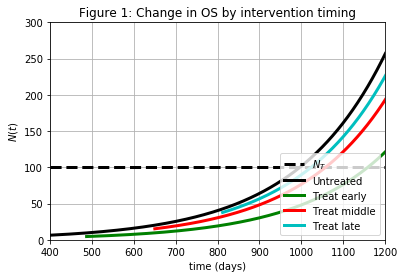

In [172]:
# N0 = [100 for i in range(total_t)]
# N = [np.exp(r[1]*t[i]) for i in range(total_t)]
# N1 = [(N[int((3/8)*total_t)] - N_c) * np.exp(r[1]*t[i]) for i in range(int((5/8)*total_t))]
# N2 = [(N[int((1/2)*total_t)] - N_c) * np.exp(r[1]*t[i]) for i in range(int((1/2)*total_t))]
# N3 = [(N[int((5/8)*total_t)] - N_c) * np.exp(r[1]*t[i]) for i in range(int((3/8)*total_t))]

# # print(N[int(total_t/4)] - N_c,N[int(total_t/2)] - N_c, N[int(3*total_t/4)] - N_c)


plt.plot(t0,N0, c = 'k', linestyle = '--',label='$N_T$',linewidth = 3.0)
plt.plot(t,N, c = 'k', label='Untreated',linewidth = 3.0)
plt.plot(t1,N1, c = 'g', label='Treat early',linewidth = 3.0)
plt.plot(t2,N2, c = 'r', label='Treat middle',linewidth = 3.0)
plt.plot(t3,N3, c = 'c', label='Treat late',linewidth = 3.0)
plt.title("Figure 1: Change in OS by intervention timing")
plt.xlabel('time (days)')
plt.ylabel('$N(t)$')
plt.grid()
plt.xlim((400,1200))
plt.ylim((0,300))
plt.legend(loc = 4)



plt.savefig(plot_path+'oligomets_curves.png', dpi = 500)

Now, let's see how a changing growth rate effects these exponential curves. This corresponds to Supplementary Figure 1. 

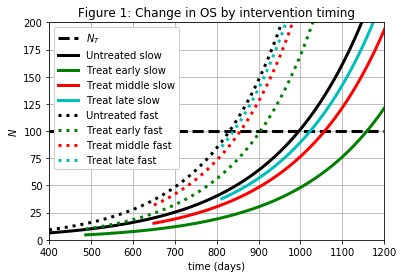

In [202]:
plt.plot(t0,N0, c = 'k', linestyle = '--',label='$N_T$',linewidth = 3.0)

plt.plot(t,N, c = 'k', label='Untreated slow',linewidth = 3.0)
plt.plot(t1,N1, c = 'g', label='Treat early slow',linewidth = 3.0)
plt.plot(t2,N2, c = 'r', label='Treat middle slow',linewidth = 3.0)
plt.plot(t3,N3, c = 'c', label='Treat late slow',linewidth = 3.0)

plt.plot(t,N_fast, c = 'k', linestyle = 'dotted', label='Untreated fast', linewidth = 3.0)
plt.plot(t1,N1_fast, c = 'g', linestyle = 'dotted', label='Treat early fast', linewidth = 3.0)
plt.plot(t2,N2_fast, c = 'r', linestyle = 'dotted', label='Treat middle fast', linewidth = 3.0)
plt.plot(t3,N3_fast, c = 'c', linestyle = 'dotted', label='Treat late fast', linewidth = 3.0)

plt.title("Figure 1: Change in OS by intervention timing")
plt.xlabel('time (days)')
plt.ylabel('$N$')
plt.grid()

# Change limits based on whether or not you're viewing the entire plot or zooming in

# Zoomed in plot of slow curves
plt.xlim((950,1200)) # zoom slow curves
plt.ylim((80,120)) # zoom slow curves
plt.savefig(plot_path+'oligomets_curves_zoom_slow.png', dpi = 500)

# Zoomed in plot of fast curves
plt.xlim((800,925)) # zoom fast curves
plt.ylim((80,120)) # zoom fast curves
plt.savefig(plot_path+'oligomets_curves_zoom_fast.png', dpi = 500)

# Complete plot
plt.xlim((400,1200))
plt.ylim((0,200))
plt.legend(loc = 2, framealpha=1)
plt.savefig(plot_path+'oligomets_curves_twoR.png', dpi = 500)


# Plotting oligometastasis parameter sensitivity and growth curves

## Parameter space

In [3]:
tumor_doubling_time = [100, 200, 300, 400] 
r = [ln(2) / tumor_doubling_time[i] for i in range(len(tumor_doubling_time))]
size = 500
N_d = np.logspace(9, 13, size)
N_c = np.logspace(9, 13, size)
Delta_t1 =  np.zeros([size, size, len(r)]) 

## Calculate change in OS across parameter space

In [13]:
for k in range(len(r)):
    for i in range(size):
        for j in range(size):
            if N_c[j] >= N_d[i]:
                Delta_t1[j,i,k] = 0
            else:
                Delta_t1[j,i,k] = (1/r[k]) * (ln (N_d[i] / (N_d[i] - N_c[j])) )

## Plot change in OS across parameter space

/Users/jessicascarborough/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/Users/jessicascarborough/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log


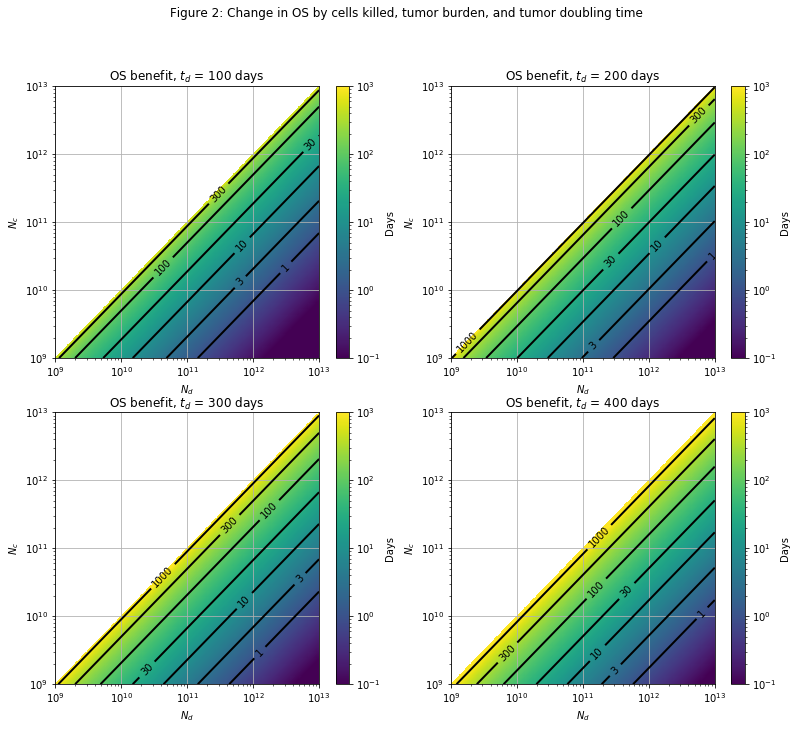

In [19]:
rcParams['figure.figsize'] = 13,11

for i in range(len(tumor_doubling_time)):
    plt.subplot(2, 2, i+1)
    heatmap = plt.pcolor(N_d, N_c, Delta_t1[:,:,i], cmap='viridis', norm=LogNorm())
    plt.title('OS benefit, $t_d$ = '+str(tumor_doubling_time[i])+' days')
    plt.xlabel('$N_d$')
    plt.ylabel('$N_c$')
    cbar = plt.colorbar()
    cbar.set_label('Days', rotation = 90)
    plt.xscale('log')
    plt.yscale('log')
    plt.clim(10**-1,10**3)
    plt.grid()
    #
    X, Y = np.meshgrid(N_d,N_c)
    #
    def iso_survival(X,Y,i):
    # if X < Y:
        # return 0
    # else:
        return (1/r[i]) * np.log(X/(X-Y))
    Z = iso_survival(X,Y,i) 
    
    # Create a simple contour plot with labels using default colors.  The
    # inline argument to clabel will control whether the labels are draw
    # over the line segments of the contour, removing the lines beneath
    # the label
    CS = plt.contour(X, Y, Z, linewidths = 2, colors= 'k', levels=[1, 3, 10, 30, 100, 300, 1000])
    plt.clabel(CS, inline=1, fontsize=10, fmt='%1.0f')

plt.suptitle("Figure 2: Change in OS by cells killed, tumor burden, and tumor doubling time", y = 0.98);


plt.savefig(plot_path+'oligomets_sens_4plot.png', dpi = 500)
